# Sistem Persamaan Linier

Secara umum persamaan linier berbentuk:
$a_1x_1+a_2x_2+...+a_nx_n=b\\$

* $a_1, a_2, ..., a_n$ **sebagai koefisien**  
* $x_1, x_2, ..., x_n$ **sebagai variabel**  
* $b$ **sebagai konstanta**  

Sedangkan **Sistem Persamaan Linier** merupakan suatu persamaan linier yang terdiri lebih dari satu persamaan linier, bisa disebut SPL.  
Bentuk umum SPL :  

$$
a_{11}x_1+a_{12}x_2+\cdots+a_{1n}x_n = b_1\\ 
a_{21}x_1+a_{22}x_2+\cdots+a_{2n}x_n = b_2\\ 
a_{31}x_1+a_{32}x_2+\cdots+a_{3n}x_n = b_3\\  
\vdots\qquad\qquad\vdots \qquad\qquad\vdots\qquad=\vdots\\
a_{m1}x_1+a_{m2}x_2+\cdots+a_{mn}x_n = b_m\\
$$

Dalam penyelesaian/solusi dari sistem persamaan linier jika nilai-nilai variabel ($x_1, x_2,...$) yang memenuhi suatu sistem persamaan linier.
Jumlah solusi dari suatu sistem persamaan linier :
* Tidak ada solusi
* Hanya satu solusi (adanya perpotongan)
* Tak hingga/banyak solusi

## Eliminasi Gauss

Eliminasi Gauss merupakan metode yang di gunakan untuk menyelesaikan sistem persamaan linier. penyelesaian tersebut dengan mengubah menjadi bentuk matriks kemudian diubah kebentuk Eselon Baris melalui Operasi Baris Elementer, Kemudian sistem diselesaikan dengan substitusi balik.  

**Tiga jenis operasi baris dasar yang dapat dilakukan pada baris matriks tersebut:**

1. Menukar posisi kedua persamaan.
2. Mengalikan suatu baris dengan skalar bukan nol .
3. Menambahkan suatu baris dengan suatu kelipatan dari baris yang lain.

## Menggambar bidang pada ruang tiga dimensi dari 3 persamaan dibawah ini 

$$ 
8x_1+9x_2+x_3=19\\ 
x_1+2x_2+3x_3=9\\ 
2x_1+x_2+x_3=5\\
$$

In [1]:
def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

Membuat array NumPy dengan nilai-nilai dibawah ini, dan memberi nama pada array A, agar bisa dipanggil lagi.

In [2]:
import numpy as np
A =np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


In [3]:
# Pindahkan baris 0 ke baris 1
A1 = RowSwap(A,0,1)
print(A1)

[[ 1.  2.  3.  9.]
 [ 8.  9.  1. 19.]
 [ 2.  1.  1.  5.]]


In [4]:
# Tambahkan -8 kali baris 0 ke baris 1
A2 = RowAdd(A1,0,1,-8)
print(A2)

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  2.   1.   1.   5.]]


In [5]:
# Tambahkan -2 kali baris 0 ke baris 2
A3 = RowAdd(A2,0,2,-2)
print(A3)

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  0.  -3.  -5. -13.]]


In [6]:
# Kalikan baris 1 dengan -1/7
A4 = RowScale(A3,1,-1/7)
print(A4)

[[  1.           2.           3.           9.        ]
 [ -0.           1.           3.28571429   7.57142857]
 [  0.          -3.          -5.         -13.        ]]


In [7]:
# Tambahkan 3 kali baris 1 ke baris 2
A5 = RowAdd(A4,1,2,3)
print(A5)

[[ 1.          2.          3.          9.        ]
 [-0.          1.          3.28571429  7.57142857]
 [ 0.          0.          4.85714286  9.71428571]]


In [8]:
# Kalikan baris 2 dengan 1/4
A6 = RowScale(A5,2,1/4.85714286)
print(A6)

[[ 1.          2.          3.          9.        ]
 [-0.          1.          3.28571429  7.57142857]
 [ 0.          0.          1.          2.        ]]


## Penyelesaian
$$  
x_1+2x_2+3x_3=9\\ 
x_2+3.28571429x_3=7.57142857\\
x_3=2\\
$$

In [9]:
# Penyelesaian persamaanya
x3 = 2
print('x3=',x3)
x2 = 7.57142857-(3.28571429*x3)
print('x2=',round(x2))
x1=9-2*x2-3*x3
print('x1=',round(x1))

x3= 2
x2= 1
x1= 1


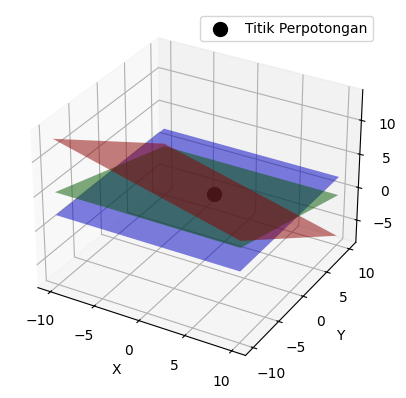

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Koefisien untuk masing-masing persamaan bidang
a1, b1, c1, r1 = 1, 2, 3, 9
a2, b2, c2, r2 = -0, 1, 3.28571429, 7.57142857
a3, b3, c3, r3 = 0, 0, 1, 2

# Buat data x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Buat grid x, y
X, Y = np.meshgrid(x, y)

# Hitung nilai z sesuai dengan persamaan bidang
Z1 = (r1 - a1*X - b1*Y) / c1
Z2 = (r2 - a2*X - b2*Y) / c2
Z3 = (r3 - a3*X - b3*Y) / c3

# Plot persamaan bidang dalam tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bidang
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

# Titik perpotongan
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
B = np.array([r1, r2, r3])
intersect = np.linalg.solve(A, B)
ax.scatter(intersect[0], intersect[1], intersect[2], color='black', s=100, label='Titik Perpotongan')

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()